1.2488457422909636
1.1903802813503228
1.3980390447993054
1.4240515594759005
1.2149862254121997
1.1815088427040408
1.142061988923188
1.2004524704085706
1.0670748755913078
1.26167183491464
29.000000000001737
58.99999999999683
89.00000000000863
119.00000000002397
149.00000000000946
178.99999999998218
208.9999999999549
238.9999999999276
268.99999999990035
298.99999999987307
328.9999999998458
358.9999999998185
388.9999999997912
418.99999999976393
448.99999999973664
478.99999999970936
508.9999999996821
538.9999999996548
568.9999999996276
598.9999999996003
628.999999999573
658.9999999995457
688.9999999995184
718.9999999994911
748.9999999994639
778.9999999994366
808.9999999994093
838.999999999382
868.9999999993547
898.9999999993274
928.9999999993001
958.9999999992729
988.9999999992456
1018.9999999992183
1048.999999999191
1078.9999999991637


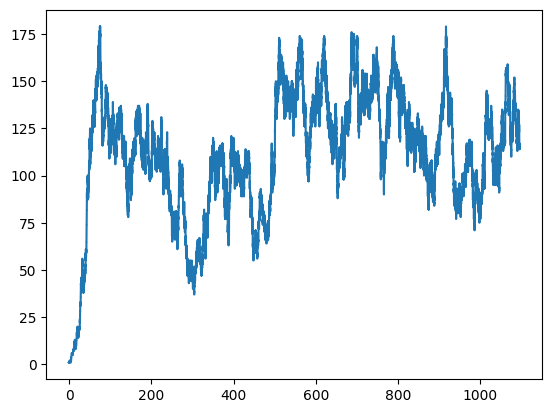

In [ ]:
from types import AsyncGeneratorType
# Factors to include in model:
# Waning immunity (will need an agent-based model so that you can remember how long ago each person was infected or vaccinated)
# Temperature/humidity effects
# Indoor crowding effects, if relevant. (These are relevant to winter diseases like flu, but not spring/summer diseases like norovirus and polio.)
import random
import matplotlib.pyplot as plt
from numpy import random


time_step_length = 0.01
pop = ['I']
R0 = 1.8
D = 5
num_steps = 109500
N = 1000
total_connections = N * 5/2
time_list = [0]
infected_count = [1]
agents = []
i_counter = 1
#When 100% immunity ends
immunity_time = 0
#When 0% immunity starts
immunity_tail = 365*2

# Set up strains
strain_number = 10

class strains:
  def __init__(self, R0, D):
    self.R0 = R0
    self.D = D

# R0 = 1.28 on average https://pubmed.ncbi.nlm.nih.gov/25186370/#:~:text=The%20median%20R%20value%20for%20seasonal%20influenza%20was%201.28%20(IQR,six%20R%20values%20were%20%3C1.

strain_list = []

# create strain list
for i in range(strain_number):
  random_R0 = random.normal(loc=1.28, scale = 0.1)
  random_D = random.normal(loc = 7, scale = 1)
  new_strain = strains(random_R0, random_D)
  strain_list.append(new_strain)

# printing strains
for i in range(strain_number):
  print(strain_list[i].R0)

class Agent:
  def __init__(self, number):
    self.number = number
    self.connections = []
    self.status = 'S'
    self.new_status = 'S'
    self.recent_strain = strain_list[0]
    self.time_since_infected = 1000

#Set up list of agents with one infected
for i in range(N):
  agents.append(Agent(i))
  agents[i].recent_strain = strain_list[random.randint(0,9)]
agents[0].status = 'I'

#Set up network (average 5 connections)
for x in range(2500):
  person = random.randint(0,N-1)
  connection = random.randint(0,N-1)
  agents[person].connections.append(connection)
  agents[connection].connections.append(person)

#update agents infection status
def update_network(*, agents, time_step_length, D, R0, pop, N, i_counter):
  for k in range(N): #Loops through agents to check status and then updates based on probablistic equations
    if agents[k].status == 'I':
      for j in range(len(agents[k].connections)):
        rand = random.random()
        if rand < R0/((len(agents[k].connections))*D)*time_step_length:
          if agents[agents[k].connections[j]].status == 'S':
            agents[agents[k].connections[j]].new_status = 'I'
            i_counter+=1 #Progressively updates amount of active infections
      rand = random.random()
      if rand < (1/D)*time_step_length:
        agents[k].new_status = 'R'
        agents[k].time_since_infected = 0 #keeping track of time since infected
        i_counter-=1 #same progressive updating
      else:
        agents[k].new_status = 'I'
    if agents[k].status == 'R':
      rand = random.random()
      if (agents[k].time_since_infected - immunity_time)/immunity_tail > rand: #this allows removed people to return to being susceptible probabalisticaly
        agents[k].new_status = 'S'
        agents[k].time_since_infected = 0
      else:
        agents[k].time_since_infected += time_step_length #updating time since infected


  for y in range(N):
    agents[y].status = agents[y].new_status

  return agents, i_counter

# spread infection
x = -1
t = 0
while i_counter >= 1 and x < num_steps*time_step_length:
  x += time_step_length
  t += 1
  agents, i_counter = update_network(agents=agents, pop=pop, R0=R0,D=D,time_step_length=time_step_length, N=N, i_counter=i_counter)
  time_list.append(x)
  #makes it easy to see progress
  if t%3000 == 0:
    print(x)
  #count amount of Is every time step
  infected_count.append(i_counter)

plt.plot(time_list, infected_count, label='infected')
plt.show()


29.000000000001737
58.99999999999683
89.00000000000863
119.00000000002397
149.00000000000946
178.99999999998218
208.9999999999549
238.9999999999276
268.99999999990035
298.99999999987307
328.9999999998458
358.9999999998185
388.9999999997912
418.99999999976393
448.99999999973664
478.99999999970936
508.9999999996821
538.9999999996548
568.9999999996276
598.9999999996003
628.999999999573
658.9999999995457
688.9999999995184
718.9999999994911
748.9999999994639
778.9999999994366
808.9999999994093
838.999999999382
868.9999999993547
898.9999999993274
928.9999999993001
958.9999999992729
988.9999999992456
1018.9999999992183
1048.999999999191
1078.9999999991637
1108.9999999991364
1138.9999999991091
1168.9999999990819
1198.9999999990546
1228.9999999990273
1258.999999999
1288.9999999989727
1318.9999999989454
1348.9999999989182
1378.9999999988909
1408.9999999988636
1438.9999999988363
1468.999999998809
1498.9999999987817
1528.9999999987544
1558.9999999987272
1588.9999999986999
1618.9999999986726
1648.9

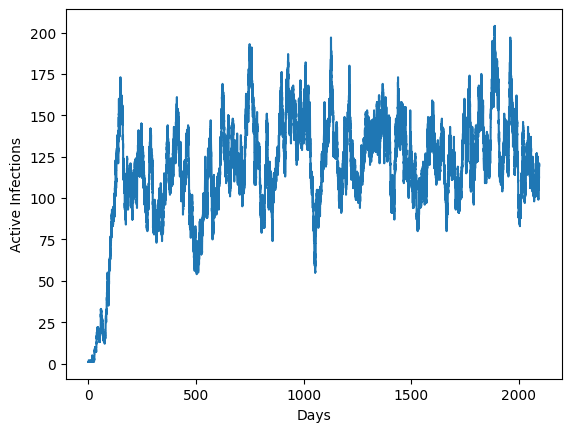

In [ ]:
#Periodicity experiment part one
#May need to run multiple times



from types import AsyncGeneratorType
# Factors to include in model:
# Waning immunity (will need an agent-based model so that you can remember how long ago each person was infected or vaccinated)
# Temperature/humidity effects
# Indoor crowding effects, if relevant. (These are relevant to winter diseases like flu, but not spring/summer diseases like norovirus and polio.)
import random
import matplotlib.pyplot as plt
from numpy import random


time_step_length = 0.01
pop = ['I']
R0 = 1.8
D = 5
num_steps = 209500
N = 1000
total_connections = N * 5/2
time_list = [0]
infected_count = [1]
agents = []
i_counter = 1
#When 100% immunity ends
immunity_time = 0
#When 0% immunity starts
immunity_tail = 365*2


class Agent:
  def __init__(self, number):
    self.number = number
    self.connections = []
    self.status = 'S'
    self.new_status = 'S'
    self.time_since_infected = 1000

#Set up list of agents with one infected
for i in range(N):
  agents.append(Agent(i))
agents[0].status = 'I'

#Set up network (average 5 connections)
for x in range(2500):
  person = random.randint(0,N-1)
  connection = random.randint(0,N-1)
  agents[person].connections.append(connection)
  agents[connection].connections.append(person)

#update agents infection status
def update_network(*, agents, time_step_length, D, R0, pop, N, i_counter):
  for k in range(N): #Loops through agents to check status and then updates based on probablistic equations
    if agents[k].status == 'I':
      for j in range(len(agents[k].connections)):
        rand = random.random()
        if rand < R0/((len(agents[k].connections))*D)*time_step_length:
          if agents[agents[k].connections[j]].status == 'S':
            agents[agents[k].connections[j]].new_status = 'I'
            i_counter+=1 #Progressively updates amount of active infections
      rand = random.random()
      if rand < (1/D)*time_step_length:
        agents[k].new_status = 'R'
        agents[k].time_since_infected = 0 #keeping track of time since infected
        i_counter-=1 #same progressive updating
      else:
        agents[k].new_status = 'I'
    if agents[k].status == 'R':
      rand = random.random()
      if (agents[k].time_since_infected - immunity_time)/immunity_tail > rand: #this allows removed people to return to being susceptible probabalisticaly
        agents[k].new_status = 'S'
        agents[k].time_since_infected = 0
      else:
        agents[k].time_since_infected += time_step_length #updating time since infected


  for y in range(N):
    agents[y].status = agents[y].new_status

  return agents, i_counter

# spread infection
x = -1
t = 0
while i_counter >= 1 and x < num_steps*time_step_length:
  x += time_step_length
  t += 1
  agents, i_counter = update_network(agents=agents, pop=pop, R0=R0,D=D,time_step_length=time_step_length, N=N, i_counter=i_counter)
  time_list.append(x)
  #makes it easy to see progress
  if t%3000 == 0:
    print(x)
  #count amount of Is every time step
  infected_count.append(i_counter)

plt.plot(time_list, infected_count, label='infected')
plt.xlabel("Days")
plt.ylabel("Active Infections")
plt.show()


In [ ]:
#Periodicity experiment part two with modifying R0
#May need to run multiple times



from types import AsyncGeneratorType
# Factors to include in model:
# Waning immunity (will need an agent-based model so that you can remember how long ago each person was infected or vaccinated)
# Temperature/humidity effects
# Indoor crowding effects, if relevant. (These are relevant to winter diseases like flu, but not spring/summer diseases like norovirus and polio.)
import random
import matplotlib.pyplot as plt
from numpy import random
import math


time_step_length = 0.01
pop = ['I']
R0_mid = 3
D = 5
num_steps = 209500
N = 1000
total_connections = N * 5/2
time_list = [0]
infected_count = [1]
agents = []
i_counter = 1
#When 100% immunity ends
immunity_time = 0
#When 0% immunity starts
immunity_tail = 365*2
R0 = 4

#vary r0
def R0 (*, R0_mid, x):
  R0 = R0_mid + 0.5*(math.cos(x*0.017214206321))
  return R0


class Agent:
  def __init__(self, number):
    self.number = number
    self.connections = []
    self.status = 'S'
    self.new_status = 'S'
    self.time_since_infected = 1000

#Set up list of agents with one infected
for i in range(N):
  agents.append(Agent(i))
agents[0].status = 'I'

#Set up network (average 5 connections)
for x in range(2500):
  person = random.randint(0,N-1)
  connection = random.randint(0,N-1)
  agents[person].connections.append(connection)
  agents[connection].connections.append(person)

#update agents infection status
def update_network(*, agents, time_step_length, D, R0, pop, N, i_counter):
  for k in range(N): #Loops through agents to check status and then updates based on probablistic equations
    if agents[k].status == 'I':
      for j in range(len(agents[k].connections)):
        rand = random.random()
        if rand < R0/((len(agents[k].connections))*D)*time_step_length:
          if agents[agents[k].connections[j]].status == 'S':
            agents[agents[k].connections[j]].new_status = 'I'
            i_counter+=1 #Progressively updates amount of active infections
      rand = random.random()
      if rand < (1/D)*time_step_length:
        agents[k].new_status = 'R'
        agents[k].time_since_infected = 0 #keeping track of time since infected
        i_counter-=1 #same progressive updating
      else:
        agents[k].new_status = 'I'
    if agents[k].status == 'R':
      rand = random.random()
      if (agents[k].time_since_infected - immunity_time)/immunity_tail > rand: #this allows removed people to return to being susceptible probabalisticaly
        agents[k].new_status = 'S'
        agents[k].time_since_infected = 0
      else:
        agents[k].time_since_infected += time_step_length #updating time since infected


  for y in range(N):
    agents[y].status = agents[y].new_status

  return agents, i_counter

# spread infection
x = -1
t = 0
while i_counter >= 1 and x < num_steps*time_step_length:
  x += time_step_length
  t += 1

  agents, i_counter = update_network(agents=agents, pop=pop, R0=R0(R0_mid = R0_mid, x=x),D=D,time_step_length=time_step_length, N=N, i_counter=i_counter)
  time_list.append(x)
  #makes it easy to see progress
  if t%3000 == 0:
    print(x)
  #count amount of Is every time step
  infected_count.append(i_counter)

plt.plot(time_list, infected_count, label='infected')
plt.xlabel("Days")
plt.ylabel("Active Infections")
plt.show()


29.000000000001737
58.99999999999683
89.00000000000863
119.00000000002397
149.00000000000946
178.99999999998218
208.9999999999549
238.9999999999276


298.9999999999995
599.0000000000676
899.0000000001359


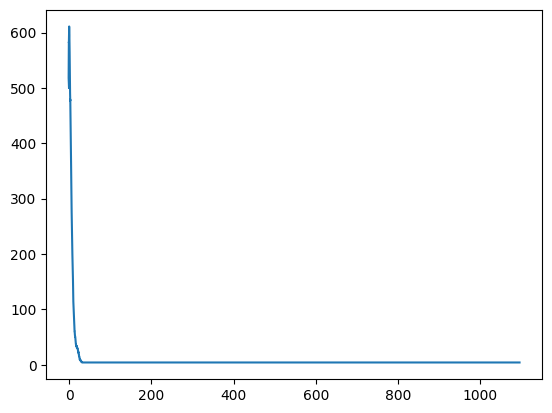

In [ ]:
# OLD





# Factors to include in model:
# Waning immunity (will need an agent-based model so that you can remember how long ago each person was infected or vaccinated)
# Temperature/humidity effects
# Indoor crowding effects, if relevant. (These are relevant to winter diseases like flu, but not spring/summer diseases like norovirus and polio.)
import random
import matplotlib.pyplot as plt

time_step_length = 0.1
pop = ['I']
R0 = 5
D = 5
num_steps = 10950
N = 1000
total_connections = N * 5/2
time_list = [0]
infected_count = [500]
agents = []
i_counter = 500
#When 100% immunity ends
immunity_time = 270
#When 0% immunity starts
immunity_tail = 270

#Characteristics of each agent
class Agent:
  def __init__(self, number):
    self.number = number
    self.connections = []
    self.status = 'S'
    self.new_status = 'S'
    self.time_since_infected = 1000
#Set up list of agents with one infected
for i in range(N):
  agents.append(Agent(i))
for m in range(500):
  agents[m].status = 'I'
#Set up network (average 5 connections)
for x in range(2500):
  person = random.randint(0,N-1)
  connection = random.randint(0,N-1)
  agents[person].connections.append(connection)
  agents[connection].connections.append(person)

#update agents infection status
def update_network(*, agents, time_step_length, D, R0, pop, N, i_counter):
  for k in range(N):
    #check if infected
    if agents[k].status == 'I':
      for j in range(len(agents[k].connections)):
        rand = random.random()
        if rand < R0/((5)*D)*time_step_length: #update based on probability
          if agents[agents[k].connections[j]].status == 'S':
            agents[agents[k].connections[j]].new_status = 'I'
            i_counter+=1 #track active infections
      rand = random.random()
      if rand < (1/D)*time_step_length:
        agents[k].new_status = 'R'
        agents[k].time_since_infected = 0
        i_counter-=1 #track active infections
      else:
        agents[k].new_status = 'I'
    if agents[k].status == 'R' and k!=0:
      rand = random.random()
     # if ((agents[k].time_since_infected - immunity_time)/immunity_tail)*time_step_length > rand:
      if agents[k].time_since_infected > immunity_time:
        agents[k].new_status = 'S'
        agents[k].time_since_infected = 0
      else:
        agents[k].time_since_infected += time_step_length


  for y in range(N):
    agents[y].status = agents[y].new_status

  return agents, i_counter
#spread infection
x = -1
t = 0
while i_counter >= 1 and x < num_steps*time_step_length:
  x += time_step_length
  t += 1
  agents, i_counter = update_network(agents=agents, pop=pop, R0=R0,D=D,time_step_length=time_step_length, N=N, i_counter=i_counter)
  time_list.append(x)
  #makes it easy to see progress
  if t%3000 == 0:
    print(x)
  #count amount of Is every time step
  infected_count.append(i_counter)

plt.plot(time_list, infected_count, label='infected')
plt.show()


In [ ]:
print(infected_count[-1])

8
